# Projecting images to latent space with my fork of StyleGAN2.

Reference: https://github.com/woctezuma/stylegan2-projecting-images

## Requirements

### Switch to Tensorflow 1.x

The default TensorFlow version in Colab switched from  1.x to 2.x on the 27th of March, 2020.

Reference: https://colab.research.google.com/notebooks/tensorflow_version.ipynb

We switch to version 1.x to avoid the following error:
> `ModuleNotFoundError: No module named 'tensorflow.contrib' colab`

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


### Install my fork of StyleGAN2

Reference: https://github.com/woctezuma/stylegan2/tree/tiled-projector

Clone my fork.

In [ ]:
%cd /content/

In [ ]:
%rm -rf stylegan2/
!git clone https://github.com/woctezuma/stylegan2.git

Cloning into 'stylegan2'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 175 (delta 18), reused 13 (delta 6), pack-reused 142
Receiving objects: 100% (175/175), 1.57 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (78/78), done.


Switch to the `tiled-projector` branch.

In [ ]:
%cd stylegan2/

/content/stylegan2


In [ ]:
!git checkout tiled-projector

Branch 'tiled-projector' set up to track remote branch 'tiled-projector' from 'origin'.
Switched to a new branch 'tiled-projector'


Install.

In [ ]:
!nvcc test_nvcc.cu -o test_nvcc -run

CPU says hello.
GPU says hello.


### Mount Google Drive

In [ ]:
!pip install Google-Colab-Transfer

In [ ]:
import colab_transfer

In [ ]:
colab_transfer.mount_google_drive()

Mounted at /content/drive/


## Image data

### Create directory

In [ ]:
%mkdir -p /content/stylegan2/raw_images
%cd /content/stylegan2/raw_images/

/content/stylegan2/raw_images


### Download images

In [ ]:
# 1 picture of the French president
file_name = 'emmanuel-macron.jpg'
!wget https://raw.githubusercontent.com/wiki/woctezuma/stylegan2-projecting-images/img/$file_name

--2020-09-12 19:40:17--  https://raw.githubusercontent.com/wiki/woctezuma/stylegan2-projecting-images/img/emmanuel-macron.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77364 (76K) [image/jpeg]
Saving to: ‘emmanuel-macron.jpg’

emmanuel-macron.jpg 100%[===================>]  75.55K  --.-KB/s    in 0.02s   

2020-09-12 19:40:18 (3.14 MB/s) - ‘emmanuel-macron.jpg’ saved [77364/77364]



In [ ]:
# 37 individual pictures of the French government
file_name = 'french-government-links.txt'
!wget https://raw.githubusercontent.com/wiki/woctezuma/stylegan2-projecting-images/img/$file_name

--2020-09-12 19:40:18--  https://raw.githubusercontent.com/wiki/woctezuma/stylegan2-projecting-images/img/french-government-links.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3926 (3.8K) [text/plain]
Saving to: ‘french-government-links.txt’

french-government-l 100%[===================>]   3.83K  --.-KB/s    in 0s      

2020-09-12 19:40:18 (83.9 MB/s) - ‘french-government-links.txt’ saved [3926/3926]



In [ ]:
!cat $file_name | xargs -n 1 wget
!rm $file_name

--2020-09-12 19:40:18--  https://upload.wikimedia.org/wikipedia/commons/1/16/%C3%89douard_Philippe-2_%2846824610355%29_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4806538 (4.6M) [image/jpeg]
Saving to: ‘Édouard_Philippe-2_(46824610355)_(cropped).jpg’

Édouard_Philippe-2_ 100%[===================>]   4.58M  16.6MB/s    in 0.3s    

2020-09-12 19:40:18 (16.6 MB/s) - ‘Édouard_Philippe-2_(46824610355)_(cropped).jpg’ saved [4806538/4806538]

--2020-09-12 19:40:18--  https://upload.wikimedia.org/wikipedia/commons/0/01/Nicole_Belloubet%2C_Ministre_de_la_Justice_2018.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting r

In [ ]:
# 5 pictures of famous paintings
file_name = 'famous-paintings-links.txt'
!wget https://raw.githubusercontent.com/wiki/woctezuma/stylegan2-projecting-images/img/$file_name

--2020-09-12 19:40:30--  https://raw.githubusercontent.com/wiki/woctezuma/stylegan2-projecting-images/img/famous-paintings-links.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 515 [text/plain]
Saving to: ‘famous-paintings-links.txt’

famous-paintings-li 100%[===================>]     515  --.-KB/s    in 0s      

2020-09-12 19:40:30 (40.9 MB/s) - ‘famous-paintings-links.txt’ saved [515/515]



In [ ]:
!cat $file_name | xargs -n 1 wget
!rm $file_name

--2020-09-12 19:40:30--  https://upload.wikimedia.org/wikipedia/commons/e/ec/Mona_Lisa%2C_by_Leonardo_da_Vinci%2C_from_C2RMF_retouched.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94310471 (90M) [image/jpeg]
Saving to: ‘Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg’

Mona_Lisa,_by_Leona 100%[===================>]  89.94M  29.1MB/s    in 3.2s    

2020-09-12 19:40:33 (28.1 MB/s) - ‘Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg’ saved [94310471/94310471]

--2020-09-12 19:40:33--  https://upload.wikimedia.org/wikipedia/commons/0/09/Antonello_da_Messina_059.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaitin

NB: It is needed to delete `.txt` files to avoid the following error when calling `align_images.py`:

```
RuntimeError: Unknown image file format: Unable to load image in file raw_images/french-government-links.txt
```

### Check the number of images

In [ ]:
%ls | wc -l

43


## External data for third-party models

In [ ]:
%cd /content/stylegan2/

/content/stylegan2


### Predictor of face landmarks (dlib)

In [ ]:
model_file = 'shape_predictor_68_face_landmarks.dat.bz2'
cache_subdir = '/root/.keras/temp/'

#### Download

In [ ]:
# !wget http://dlib.net/files/$model_file

In [ ]:
# %mkdir -p $cache_subdir
# %mv $model_file $cache_subdir

#### Export to Google Drive

In [ ]:
# colab_transfer.copy_file(file_name=model_file,
#                          source=cache_subdir,
#                          destination=colab_transfer.get_path_to_home_of_google_drive())

#### Import from Google Drive

In [ ]:
colab_transfer.copy_file(file_name=model_file,
                         destination=cache_subdir)

Copying /content/drive/My Drive/shape_predictor_68_face_landmarks.dat.bz2 to /root/.keras/temp/shape_predictor_68_face_landmarks.dat.bz2


### Feature extractor (VGG-16)

In case, you want to manually feed `--vgg16-pkl vgg16_zhang_perceptual.pkl` to `project_images.py`.

#### Download

In [ ]:
# !wget http://d36zk2xti64re0.cloudfront.net/stylegan1/networks/metrics/vgg16_zhang_perceptual.pkl

### StyleGAN2 model trained on FFHQ (config-f)

In case, you want to manually feed `--network-pkl stylegan2-ffhq-config-f.pkl` to `project_images.py`.

#### Download

In [ ]:
# !wget  http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-ffhq-config-f.pkl

## StyleGAN2 workflow

In [ ]:
%cd /content/stylegan2/

/content/stylegan2


### Alignment

Reference: https://github.com/woctezuma/stylegan2/tree/tiled-projector

#### Run

In [ ]:
%cd /content/stylegan2/

/content/stylegan2


In [ ]:
# !python align_images.py raw_images/ aligned_images/

In [ ]:
archive_name = 'aligned_images.tar.gz'

##### Export aligned images

In [ ]:
folder_name = 'aligned_images'

# !tar -cvf $archive_name $folder_name/
# !du -sh $archive_name

In [ ]:
# colab_transfer.copy_file(file_name=archive_name,
#                          source=colab_transfer.get_path_to_home_of_local_machine() + 'stylegan2/',
#                          destination=colab_transfer.get_path_to_home_of_google_drive())

##### Import aligned images

In [ ]:
colab_transfer.copy_file(file_name=archive_name,
                         destination=colab_transfer.get_path_to_home_of_local_machine() + 'stylegan2/')

Copying /content/drive/My Drive/aligned_images.tar.gz to /content/stylegan2/aligned_images.tar.gz


In [ ]:
!du -sh $archive_name
!tar -xvf $archive_name

### Boilerplate clean-up function

In [ ]:
from pathlib import Path
import glob
import os

def clean_up_temporary_folder(temporary_input_folder,
                              output_folder,
                              file_extension='.png',
                              verbose=False):

  file_names = glob.glob(output_folder + '*' + file_extension)

  for f in file_names:
    f_path = Path(f)
    base_name = f_path.name

    g = temporary_input_folder + base_name

    g_path = Path(g)  
    if g_path.is_file():
      if verbose:
        print('Removing {}'.format(g))
      os.remove(g)

  return

### Projecting images to latent space

Reference: https://github.com/woctezuma/stylegan2/tree/tiled-projector

#### Either `--tiled` (default) projection

This is the projector suggested in [Nvidia's implementation](https://github.com/NVlabs/stylegan2), using `W(1, 512)`.

In [ ]:
%cd /content/stylegan2/

/content/stylegan2


##### Run

###### Copy aligned images to a temporary folder `aligned_images_A/`

In [ ]:
temporary_input_folder = 'aligned_images_A/'

%mkdir -p $temporary_input_folder
%cp aligned_images/*.png $temporary_input_folder

###### Clean up the temporary folder to avoid redundant computations

In [ ]:
output_folder = 'generated_images_tiled/'

clean_up_temporary_folder(temporary_input_folder, output_folder)
%ls $temporary_input_folder

###### Vanilla

In [ ]:
# !python project_images.py aligned_images_A/ generated_images_tiled/

In [ ]:
archive_name = 'generated_images_tiled.tar.gz'

###### Video

To output a video of the projection process, run the following instead:

**Caveat**: this is much slower, because many images are saved and concatenated!

In [ ]:
# !python project_images.py aligned_images_A/ generated_images_tiled/ \
#  --video True --video-mode 2

##### Export projected images

In [ ]:
folder_name = 'generated_images_tiled'

# !tar -cvf $archive_name $folder_name/
# !du -sh $archive_name

In [ ]:
# colab_transfer.copy_file(file_name=archive_name,
#                          source=colab_transfer.get_path_to_home_of_local_machine() + 'stylegan2/',
#                          destination=colab_transfer.get_path_to_home_of_google_drive())

##### Import projected images

In [ ]:
colab_transfer.copy_file(file_name=archive_name,
                         destination=colab_transfer.get_path_to_home_of_local_machine() + 'stylegan2/')

Copying /content/drive/My Drive/generated_images_tiled.tar.gz to /content/stylegan2/generated_images_tiled.tar.gz


In [ ]:
!du -sh $archive_name
!tar -xvf $archive_name

#### Or `--no-tiled` projection

This is the projector suggested in [`rolux/stylegan2encoder`](https://github.com/rolux/stylegan2encoder), using `W(18, 512)`.

Visual fidelity is higher, but semantic fidelity is lower.

In [ ]:
%cd /content/stylegan2/

/content/stylegan2


##### Run

###### Copy aligned images to a temporary folder `aligned_images_B/`

In [ ]:
temporary_input_folder = 'aligned_images_B/'

%mkdir -p $temporary_input_folder
%cp aligned_images/*.png $temporary_input_folder

###### Clean up the temporary folder to avoid redundant computations

In [ ]:
output_folder = 'generated_images_no_tiled/'

clean_up_temporary_folder(temporary_input_folder, output_folder)
%ls $temporary_input_folder

###### Vanilla

In [ ]:
# !python project_images.py aligned_images_B/ generated_images_no_tiled/ \
#  --no-tiled

In [ ]:
archive_name = 'generated_images_no_tiled.tar.gz'

###### Video

To output a video of the projection process, run the following instead:

**Caveat**: this is much slower, because many images are saved and concatenated!

In [ ]:
# !python project_images.py aligned_images_B/ generated_images_no_tiled/ \
#  --no-tiled \
#  --video True --video-mode 2

##### Export projected images

In [ ]:
# folder_name = 'generated_images_no_tiled'

# !tar -cvf $archive_name $folder_name/
# !du -sh $archive_name

generated_images_no_tiled/
generated_images_no_tiled/Sophie_Cluzel_2018-04-06_lancement_stratégie_autisme_2018-2022_(3)_01.npy
generated_images_no_tiled/PERÚ_Y_FRANCIA_FIRMARON_IMPORTANTES_ACUERDOS_DE_COOPERACIÓN_EN_DEFENSA_(10678701576)-cropped_01.png
generated_images_no_tiled/Frédérique_Vidal_-_2018_(cropped)_01.png
generated_images_no_tiled/993px-Ginevra_de'_Benci_-_National_Gallery_of_Art_01.npy
generated_images_no_tiled/Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched_02.png
generated_images_no_tiled/Olivier_Véran_-_Juillet_2012_01.npy
generated_images_no_tiled/Roxana_Maracineanu_-_2018_(cropped)_01.npy
generated_images_no_tiled/Venus_botticelli_detail_01.npy
generated_images_no_tiled/Gérald_Darmanin_2019_(cropped)_01.png
generated_images_no_tiled/Marlène_Schiappa_à_la_tribune_de_l'ONU_(cropped)_01.png
generated_images_no_tiled/Jean-Baptiste_Djebbari_-_2019_(cropped)_01.png
generated_images_no_tiled/Marc5_(4305630213)_01.npy
generated_images_no_tiled/Portrait_d'Annick_Girardi

In [ ]:
# colab_transfer.copy_file(file_name=archive_name,
#                          source=colab_transfer.get_path_to_home_of_local_machine() + 'stylegan2/',
#                          destination=colab_transfer.get_path_to_home_of_google_drive())

Copying /content/stylegan2/generated_images_no_tiled.tar.gz to /content/drive/My Drive/generated_images_no_tiled.tar.gz


##### Import projected images

In [ ]:
colab_transfer.copy_file(file_name=archive_name,
                         destination=colab_transfer.get_path_to_home_of_local_machine() + 'stylegan2/')

Copying /content/drive/My Drive/generated_images_no_tiledB.tar.gz to /content/stylegan2/generated_images_no_tiledB.tar.gz


In [ ]:
!du -sh $archive_name
!tar -xvf $archive_name

### Display some results

#### Boilerplate functions

In [ ]:
from PIL import Image 
from IPython.display import display

def display_image_from_file(image_name):
  # Reference: https://stackoverflow.com/a/50723518
  
  image_content = Image.open(image_name)
  display(image_content)

  return

def display_image_from_array(array):
  # Reference: https://gist.github.com/kylemcdonald/2f1b9a255993bf9b2629

  image_content = Image.fromarray(array)
  display(image_content) 

  return    

#### Display an aligned image

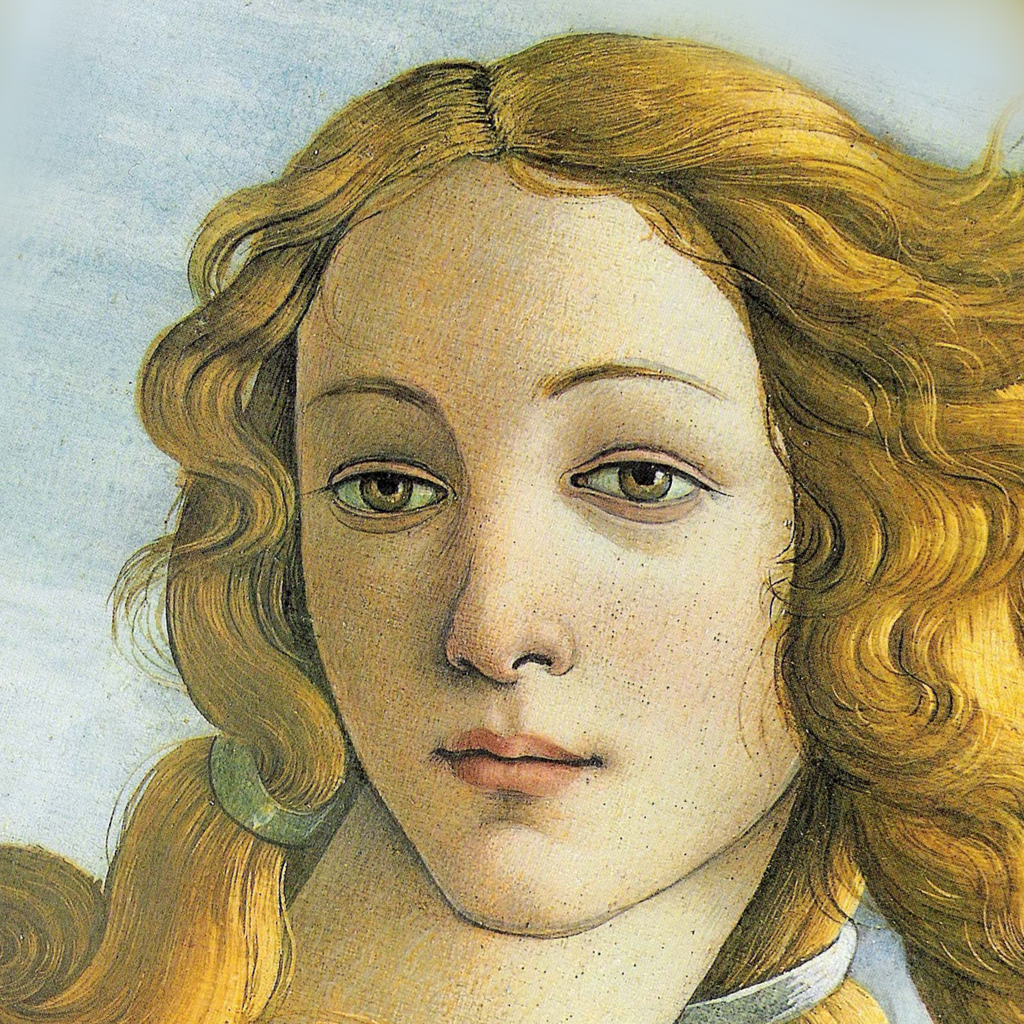

In [ ]:
 image_name = 'aligned_images/Venus_botticelli_detail_01.png'
 display_image_from_file(image_name) 

#### Display a projected image (``--tiled``)

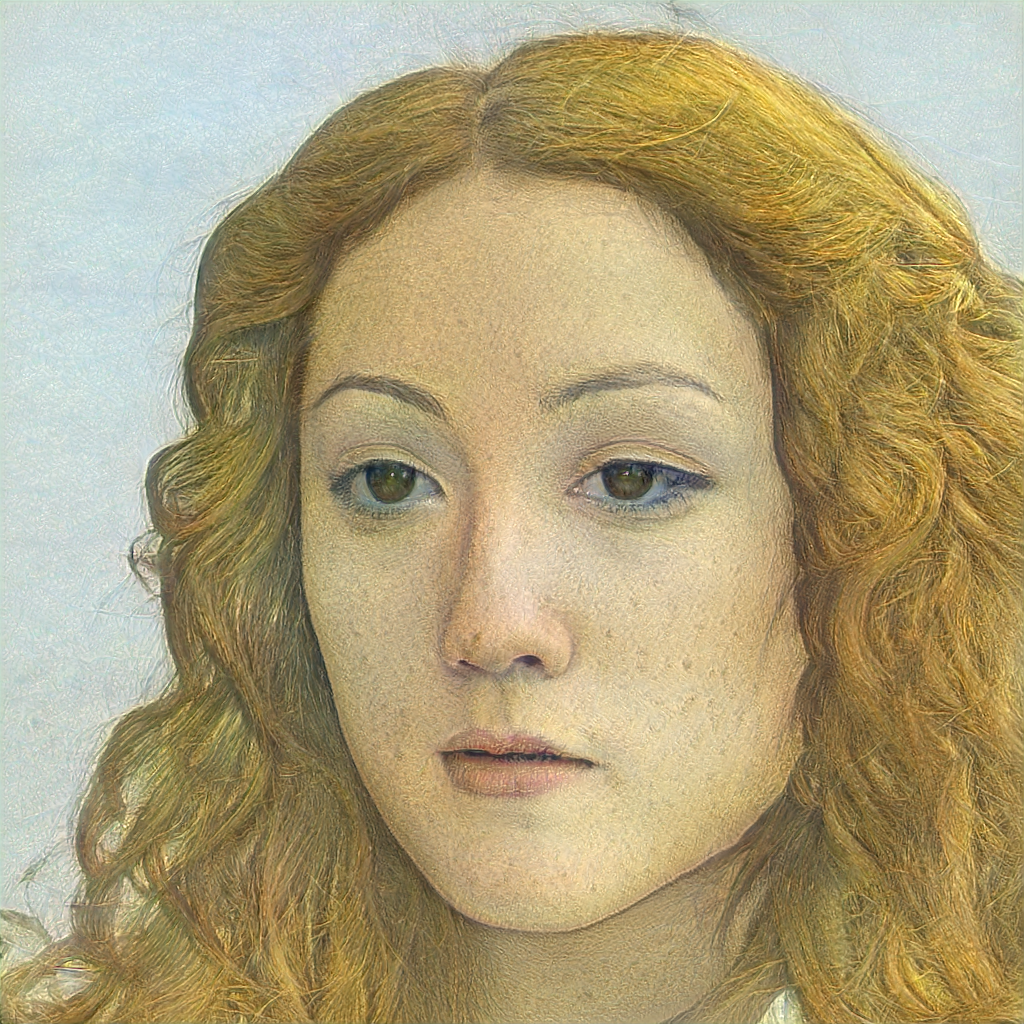

In [ ]:
 image_name = 'generated_images_tiled/Venus_botticelli_detail_01.png'
 display_image_from_file(image_name) 

#### Display a projected image (``--no-tiled``)

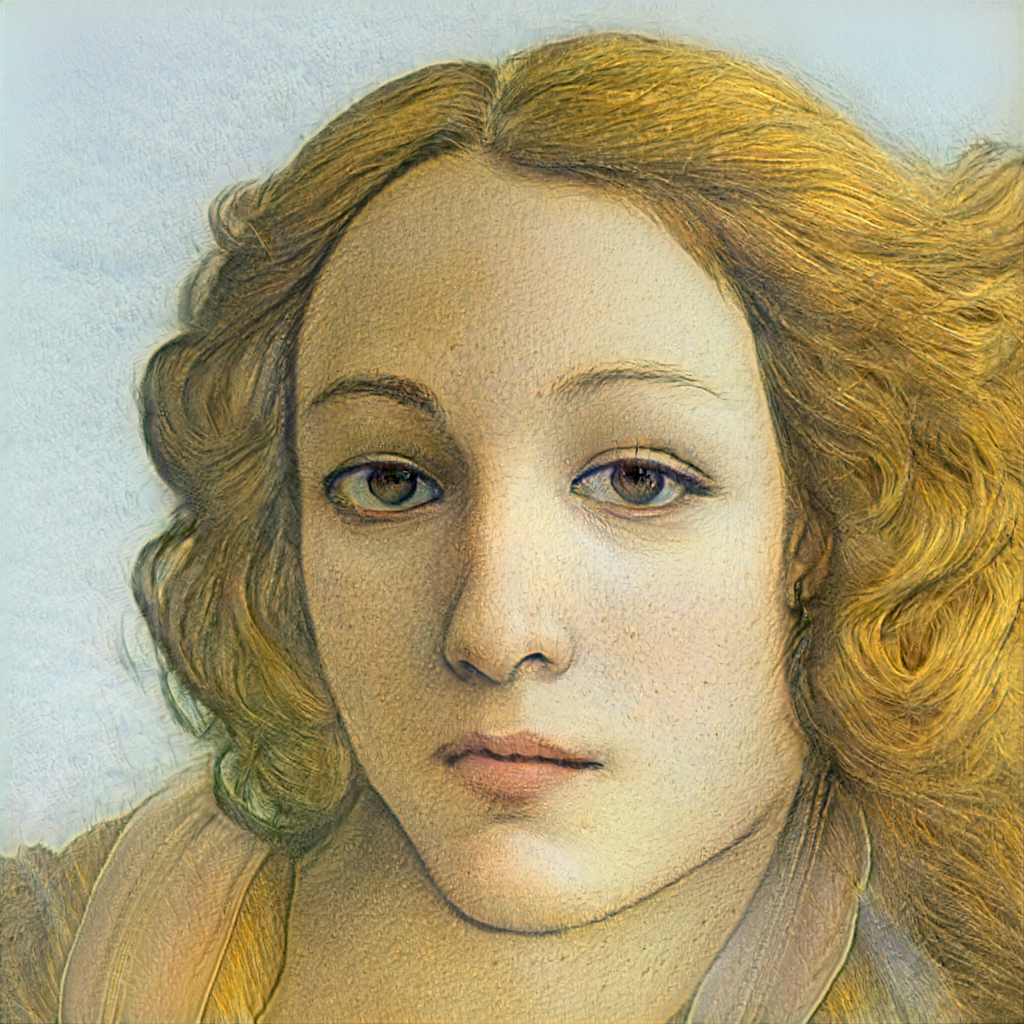

In [ ]:
 image_name = 'generated_images_no_tiled/Venus_botticelli_detail_01.png'
 display_image_from_file(image_name) 

Done.